# 还原模型(基于单隐层神经网络的手写数字识别)

# 载入数据

In [1]:
import tensorflow as tf

#导入Tensorflow提供的读取MNIST的模块
import tensorflow.examples.tutorials.mnist.input_data as input_data

#读取MNIST数据
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#定义全连接层函数
def fcn_layer(inputs,
              input_dim,
              output_dim,
              activation=None):
    
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1)) #以截断正态分布的随机数初始化W
    
    b = tf.Variable(tf.zeros([output_dim])) #以0初始化b
    
    XWb = tf.matmul(inputs, W) + b #建立表达式: inputs * W + b
    
    if activation is None: #默认有使用激活函数
        outputs = XWb
    else: 
        outputs = activation(XWb) # 若传入激活函数，则用其对输出结果进行变换
    
    return outputs

# 构建输入层

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name="X")

# 构建模型

In [4]:
H1_NN = 256 # 隐藏层神经元数量256

# 构建隐藏层

In [5]:
h1 = fcn_layer(inputs=x,
               input_dim=784,
               output_dim=H1_NN,
               activation=tf.nn.relu)

# 构建输出层 

In [6]:
forward = fcn_layer(inputs=h1,
                    input_dim=H1_NN,
                    output_dim=10,
                    activation=None)
pred = tf.nn.softmax(forward)

# 训练模型

In [7]:
#定义标签数据占位符
y = tf.placeholder(tf.float32, [None, 10], name="Y")

# 定义损失函数

In [8]:
#交叉熵
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=forward
                                                                       , labels=y))

# 设置训练参数

In [9]:
# train_epochs = 40
# batch_size = 50
# total_batch = int(mnist.train.num_examples/batch_size)
# display_step = 1
learning_rate = 0.01

# 选择优化器

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

# 定义准确率

In [11]:
correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 还原模型

# 设置目录

In [12]:
# 必须指定为模型文件的存放目录
ckpt_dir = "./ckpt_dir/"

# 读取模型

In [13]:
saver = tf.train.Saver()

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

ckpt = tf.train.get_checkpoint_state(ckpt_dir)

if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path) #从已保存的模型中读取参数
    print("restore model from " + ckpt.model_checkpoint_path)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ckpt_dir/mnist_h256_model.ckpt
restore model from ./ckpt_dir/mnist_h256_model.ckpt


# 输出模型准确率

In [14]:
print("Accuracy:", accuracy.eval(session=sess,
                                 feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9711


# 评估模型

In [15]:
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy:", accu_test)

Test Accuracy: 0.9711


# 进行预测

In [16]:
#由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字。
prediction_result=sess.run(tf.argmax(pred,1), feed_dict={x: mnist.test.images})

In [17]:
#查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 定义可视化函数

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,     #图像列表
                                  labels,     #标签列表
                                  prediction, #预测值列表
                                  index,      #从第index个开始显示
                                  num=10):    #缺省一次显示10幅
    fig = plt.gcf() #获取当前图表,Get Current Figure
    fig.set_size_inches(10,12) #1英寸等于2.54cm
    if num > 25:
        num = 25                #最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) #获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28, 28)),cmap='binary')
        title = "label=" + str(np.argmax(labels[index])) #构建该图上要显示的title
        if len(prediction)>0:
            title += ",predict=" + str(prediction[index])
        ax.set_title(title,fontsize=10) #显示图上的title信息
        ax.set_xticks([]); #不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

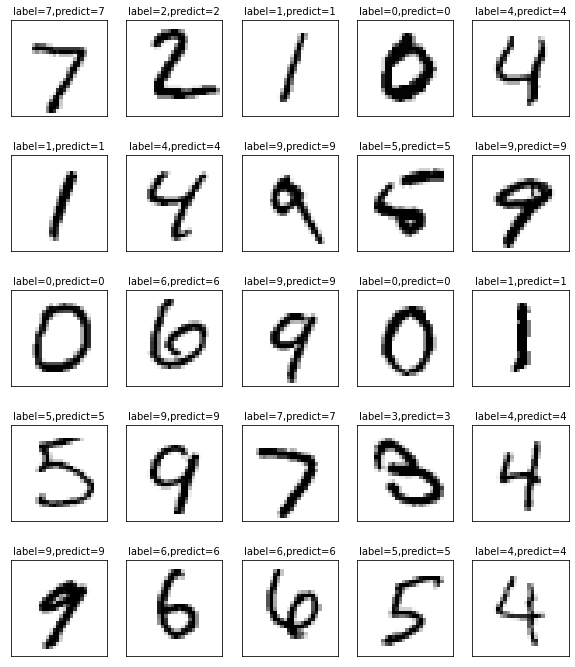

In [19]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0,25)

# 找出预测错误

In [20]:
import numpy as np
compare_lists = prediction_result==np.argmax(mnist.test.labels,1) 
print(compare_lists)

[ True  True  True ...  True  True  True]


In [21]:
err_lists = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
print(err_lists, len(err_lists))

[61, 92, 125, 149, 247, 259, 320, 321, 339, 340, 445, 447, 448, 495, 552, 582, 619, 646, 659, 674, 684, 691, 692, 699, 707, 720, 844, 846, 877, 882, 938, 951, 956, 965, 1014, 1032, 1039, 1101, 1107, 1112, 1156, 1166, 1226, 1232, 1239, 1242, 1247, 1270, 1272, 1289, 1292, 1310, 1319, 1325, 1328, 1337, 1415, 1425, 1433, 1444, 1494, 1522, 1530, 1549, 1553, 1554, 1559, 1569, 1609, 1621, 1669, 1681, 1709, 1717, 1754, 1790, 1822, 1823, 1828, 1838, 1850, 1865, 1878, 1901, 1941, 1952, 1955, 1982, 2004, 2016, 2024, 2044, 2070, 2098, 2105, 2130, 2135, 2182, 2224, 2237, 2272, 2293, 2308, 2369, 2387, 2406, 2447, 2454, 2459, 2462, 2488, 2589, 2597, 2607, 2654, 2756, 2770, 2771, 2860, 2877, 2896, 2921, 2927, 2938, 2939, 2953, 3005, 3023, 3030, 3110, 3225, 3289, 3369, 3384, 3422, 3475, 3503, 3511, 3520, 3533, 3558, 3559, 3567, 3597, 3662, 3681, 3702, 3727, 3767, 3776, 3808, 3811, 3817, 3838, 3853, 3876, 3906, 3941, 3985, 4007, 4044, 4065, 4078, 4116, 4140, 4154, 4176, 4201, 4205, 4224, 4259, 4289, 429

# 定义一个输出错误分类的函数

In [22]:
def print_predict_errs(labels,      #标签列表
                       prediction): #预测值列表
    count = 0
    compare_lists = (prediction==np.argmax(labels,1))
    err_lists = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
    for x in err_lists:
        print("index="+str(x)+ 
              " 标签值=",np.argmax(labels[x]),
              "预测值=",prediction[x])
        count = count + 1
    print("总计:"+str(count))

In [23]:
print_predict_errs(labels=mnist.test.labels,
                   prediction=prediction_result)

index=61 标签值= 8 预测值= 2
index=92 标签值= 9 预测值= 4
index=125 标签值= 9 预测值= 4
index=149 标签值= 2 预测值= 9
index=247 标签值= 4 预测值= 2
index=259 标签值= 6 预测值= 0
index=320 标签值= 9 预测值= 8
index=321 标签值= 2 预测值= 7
index=339 标签值= 6 预测值= 5
index=340 标签值= 5 预测值= 3
index=445 标签值= 6 预测值= 0
index=447 标签值= 4 预测值= 9
index=448 标签值= 9 预测值= 3
index=495 标签值= 8 预测值= 0
index=552 标签值= 0 预测值= 8
index=582 标签值= 8 预测值= 2
index=619 标签值= 1 预测值= 8
index=646 标签值= 2 预测值= 6
index=659 标签值= 2 预测值= 8
index=674 标签值= 5 预测值= 3
index=684 标签值= 7 预测值= 3
index=691 标签值= 8 预测值= 4
index=692 标签值= 5 预测值= 3
index=699 标签值= 3 预测值= 5
index=707 标签值= 4 预测值= 1
index=720 标签值= 5 预测值= 8
index=844 标签值= 8 预测值= 7
index=846 标签值= 7 预测值= 9
index=877 标签值= 8 预测值= 5
index=882 标签值= 9 预测值= 4
index=938 标签值= 3 预测值= 5
index=951 标签值= 5 预测值= 7
index=956 标签值= 1 预测值= 6
index=965 标签值= 6 预测值= 0
index=1014 标签值= 6 预测值= 5
index=1032 标签值= 5 预测值= 6
index=1039 标签值= 7 预测值= 2
index=1101 标签值= 8 预测值= 2
index=1107 标签值= 9 预测值= 3
index=1112 标签值= 4 预测值= 6
index=1156 标签值= 7 预测值= 8
index=1166 